# ¿Cómo leer archivos con formato `FITS` utilizando Python y Astropy?

## Descripción del archivo `FITS`
Los archivos con formato `FITS` (*Flexible Image Transport System*) son comúnmente utilizados por la Union 
Astronómica Internacional y la NASA para almacenar espectros electromagnéticos y otros datos. 
La ventaja fundamental es que las cabeceras (headers o metadatos) se encuentran en `ASCII`.

Los archivos `FITS` pueden contener dos tipos de estructuras de datos:

* *Table Data* o tabla de datos similares a el formato de `Excel`.
* *Image Data* o datos de imagen que representan bases de datos relacionales o "imagenes" que generalmente se refieren a arreglos de matrices multidimesionales.

## Autor

* Erika Munoz, **desarrollador principal**
* Jose Nandez, **debugger**

## Referencias

##### Importamos las bibliotecas necesarias

In [98]:
from astropy.io import fits
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leyendo `FITS` que contienen tabla de datos

Abrimos el archivo FITS

In [65]:
archivo_fits = fits.open('Orion.fits') #open file

La función o metodo `.open()` regresa un objeto llamado `HDUList` que es salvado en la variable `archivo_fits`. Dicha variable es una lista (`list`) de objetos `HDU` (Header Data Unit) que consiste de  

* cabecera y; 
* un arreglo de datos o tabla.

In [94]:
type(archivo_fits)

astropy.io.fits.hdu.hdulist.HDUList

Podemos utilizar el metodo `.info()` para ver un resumen del contenido del archivo `FITS`. 

In [18]:
archivo_fits.info() #resume el contenido de la tabla

Filename: rb0035.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (3071,)   float32   
  1                1 ImageHDU       107   (3071,)   float32   


##### Trabajando con los Headers o cabeceras de nuestro archivo FITS

Para acceder a la `list` guardada en `archivo_fits` se necesita un indice, que en `Python` inicia en `0`.

Nuestro objeto `HDU` contiene dos atributos, 

* `.header`: contienen cartas de 80 bytes en donde cada carta contiene (1) parámetro (o keyword), (2) valor (o value) y (3) comentario (o comment);
* `.data`: si el objeto `HDU` es una imagen, dicho atributo regresara un objeto [`ndarray`](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html), que es un contenedor multidimensional de valores del mismo tamaño y tipo de datos.  


In [63]:
archivo_fits[0].header;

In [60]:
archivo_fits[0].data;

array([0.49964213, 0.650326  , 0.7764902 , ..., 0.7523398 , 0.6623401 ,
       0.81216264], dtype=float32)

In [75]:
archivo_fits[0].is_image

True

In [76]:
type(archivo_fits[0].data)

numpy.ndarray

Podemos acceder a un valor contenido en la cabecera por medio de un índice

In [58]:
archivo_fits[0].header[8]

'HD 177724'

Tambien podemos acceder al mismo valor por medio de su parámetro o *keyword*

In [39]:
archivo_fits[0].header['OBJECT'] #object id, leemos el valor asociado al header[keyword]

'HD 177724'

In [40]:
archivo_fits[0].header['DATE']

'2016-08-19T15:50:12'

## Leyendo FITS que contienen datos de una imagen
En las siguientes celdas leeremos FITS que contienen datos de la Nebulosa de Helix

In [77]:
helix_nebula = fits.open("/home/erika/Downloads/ngc7293_herschel250micron.fits") 

In [78]:
type(helix_nebula)

astropy.io.fits.hdu.hdulist.HDUList

In [83]:
helix_nebula.info()

Filename: /home/erika/Downloads/ngc7293_herschel250micron.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   ()      
  1  image         1 ImageHDU        50   (1179, 1191)   float64   
  2  error         1 ImageHDU        20   (1179, 1191)   float64   
  3  coverage      1 ImageHDU        20   (1179, 1191)   float64   
  4  History       1 ImageHDU        23   ()      
  5  HistoryScript    1 BinTableHDU     39   75R x 1C   [318A]   
  6  HistoryTasks    1 BinTableHDU     46   47R x 4C   [1K, 27A, 1K, 8A]   
  7  HistoryParameters    1 BinTableHDU     74   198R x 10C   [1K, 26A, 7A, 21A, 1L, 1K, 1L, 74A, 11A, 41A]   


In [122]:
helix_nebula['image'].header

XTENSION= 'IMAGE   '           / Java FITS: Wed Nov 28 17:22:15 GMT 2012        
BITPIX  =                  -64                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 1179                                                  
NAXIS2  =                 1191                                                  
PCOUNT  =                    0 / No extra parameters                            
GCOUNT  =                    1 / One group                                      
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywords whose name = 'CONTINUE'.                         
          -------------- Her

In [102]:
np.nanmean(helix_nebula[1].data)

-0.0014085344589071915

No handles with labels found to put in legend.


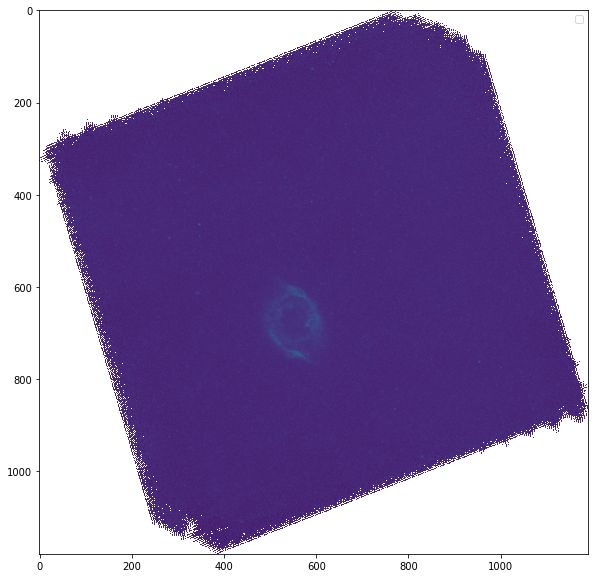

In [101]:
plt.figure(figsize=(10,10))
plt.imshow(helix_nebula[1].data.T)

## Leyendo muchos archivos `FITS` al mismo tiempo

Muchas veces queremos aplicar el mismo análisis a diferentes observaciones. Por ejemplo, imagina que queremos encontrar el flujo  máximo, mínimo y la media de nuestros objetos observados. Usando `np.nanmin`, `np.nanmax` y `np.nanmean` y además un ciclo `for` junto con `glob` para encontrar a todos nuestros objetos en la carpeta deseada. 

Nota: Usamos `np.nanmin` porque los datos contienen `nan` mezclados con valores de tipo `float`

In [119]:
lista_archivos = glob("/home/erika/Downloads/*.fits") # cargamos los archivos con formato FITS

minimo = [] #define una lista vacia
maximo = []
media  = []
nombre = []

for archivo in lista_archivos:
    archivo_fits = fits.open(archivo,"readonly",memmap=False) #leer un archivo FITS
    #Utilizando el metodo .append insertamos el valor minimo de los datos.
    minimo.append(np.nanmin(archivo_fits['image'].data)) 
    #Utilizando el metodo .append insertamos el valor maximo de los datos.
    maximo.append(np.nanmax(archivo_fits['image'].data))
    #Utilizando el metodo .append insertamos la media de los datos.
    media.append(np.nanmean(archivo_fits['image'].data))
    #Utilizando el metodo .append insertamos el nombre del objeto astronomico.
    nombre.append(archivo_fits['PRIMARY'].header["OBJECT"])
    archivo_fits.close()      

Una vez que tenemos los valores en listas individuales, podemos usar `PANDAS` para crear un marco de datos o `DataFrame`.

In [120]:
descripcion = pd.DataFrame({'nombre':nombre,'minimo':minimo,'maximo':maximo,'media':media})

In [121]:
descripcion

,nombre,minimo,maximo,media
0,OrionB-S-1,-0.530293,503.876953,0.335240
1,NGC 7293,-0.157353,1.205974,-0.001409
